In [28]:
import re
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [29]:
url = "https://dominicweb.eu/en/dictionaries/malagasy/grammar/"

page = requests.get(url)

soup = BeautifulSoup(page.text, "html")

In [30]:
# <i class="ex">Rahoviana no ho tonga izy?</i>

In [31]:
paragraph_all = soup.find_all('i')



In [32]:
paragraph = [words.text.strip() for words in paragraph_all]

print(paragraph[38:])


['Mamaky boky ny mpianatra.', '"read the book the student" - A\r\n\t\tstudent reads a book.', "Miandry ny taratasinao aho isan'andro.", '"Wait for the letter-your me every day." - Every\r\n\t\tday I wait for your letter.', 'ny', 'Tsara ny\r\n\t\tandro.', '"Beautiful the day." - It is a beautiful day.', 'Faly aho', '"Happy\r\n\t\tme." - I am happy.', 'Tanora ny raiko', '"Young the father mine." - My father is young.', 'misy', 'there is', 'Aiza no misy ny tranonareo?', '"Where\r\n\t\tthere is the home-yours?" - Where is your home?', 'tsy\r\n\t\tmisy', 'there is not', 'tsisy', 'Tsisy olana!', '"There\r\n\t\tis not problem!" - No problem', 'no', 'dia', 'Ianao no nanoratra ity taratasy ity.', '"You who write-past-tense this letter this." - It is you, who wrote this letter.', 'no', 'Izaho no\r\n\t\tmpiandry ondry tsara.', '"Me the one that shepherd sheep good." - I am a good shepherd.', 'No', 'It is you (and no one\r\n\t\telse), who wrote this letter.', 'dia', 'Ianao dia nanoratra ity tarata

In [37]:
def group_translations(words):
    groups = []
    i = 0
    while i < len(words):
        if i + 1 < len(words):
            groups.append((words[i].strip(), words[i + 1].strip()))
            i += 2
        else:
            groups.append((words[i].strip(), ""))
            i += 1
    return groups

words = paragraph[38:]  
paired = group_translations(words)

for i, (malagasy, english) in enumerate(paired[0:83]):
   text = " ".join([f"{malagasy} {english}" for malagasy, english in paired])


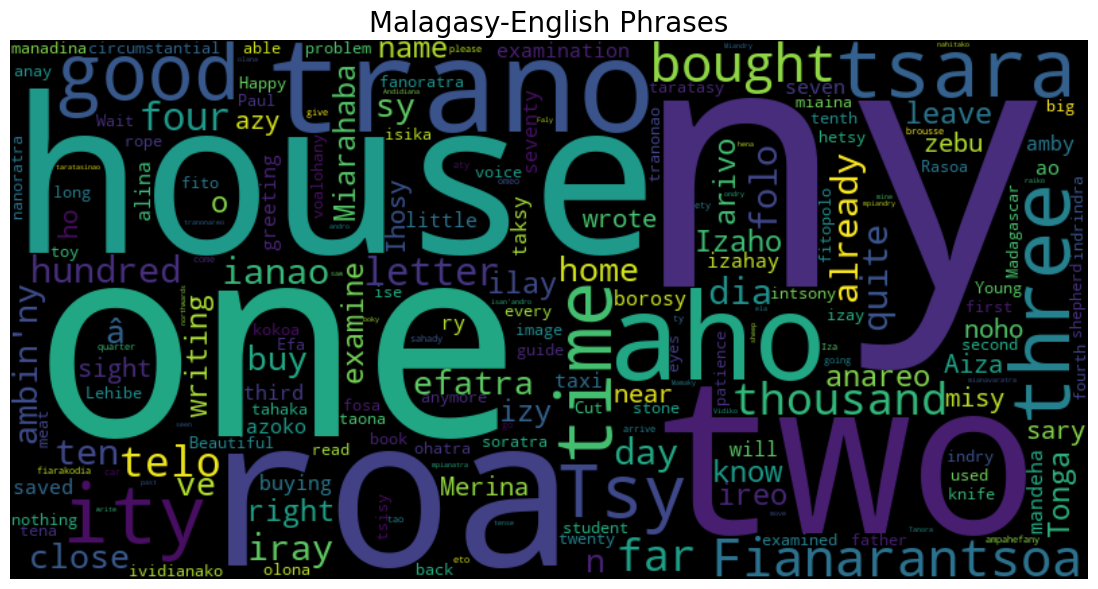

In [41]:
#adding a visualization method or agent i chose wordcloud

wordcloud = WordCloud(width=800, height=400, background_color='black', collocations=False).generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Malagasy-English Phrases", fontsize=20)
plt.show()

